In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

['Untitled.ipynb', '.ipynb_checkpoints', 'diabetes.csv']


In [7]:
data = pd.read_csv("./diabetes.csv")


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#Split Data as M&B
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

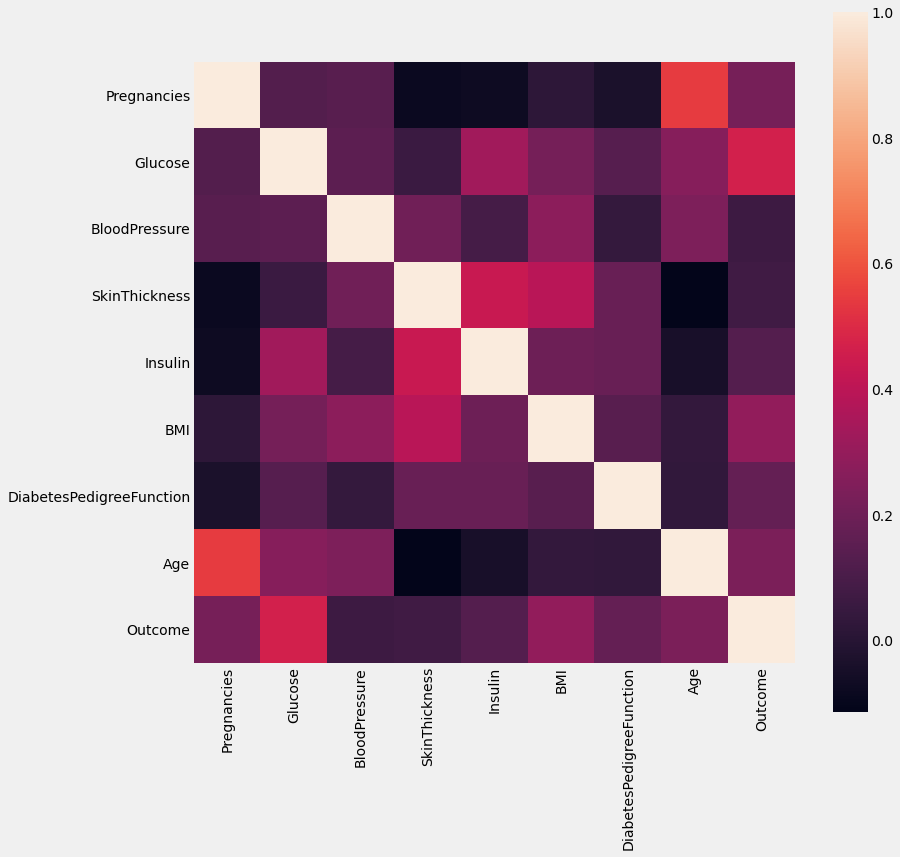

List the numerical features decendingly by their correlation:

('Glucose', 0.4665813983068757)
('BMI', 0.29269466264444666)
('Age', 0.23835598302719743)
('Pregnancies', 0.2218981530339883)
('DiabetesPedigreeFunction', 0.17384406565296076)
('Insulin', 0.13054795488404808)
('SkinThickness', 0.07475223191831948)
('BloodPressure', 0.06506835955033308)


In [13]:
hitmapTemp = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
hitmapData = hitmapTemp.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(hitmapData, vmax=1, square=True)
plt.show()
hitmap_dict = hitmapData['Outcome'].to_dict()
del hitmap_dict['Outcome']
print("List the numerical features decendingly by their correlation:\n")
for ele in sorted(hitmap_dict.items(), key = lambda x: -abs(x[1])):
    print(ele)

In [97]:
#Visualization
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

AttributeError: 'list' object has no attribute 'get'

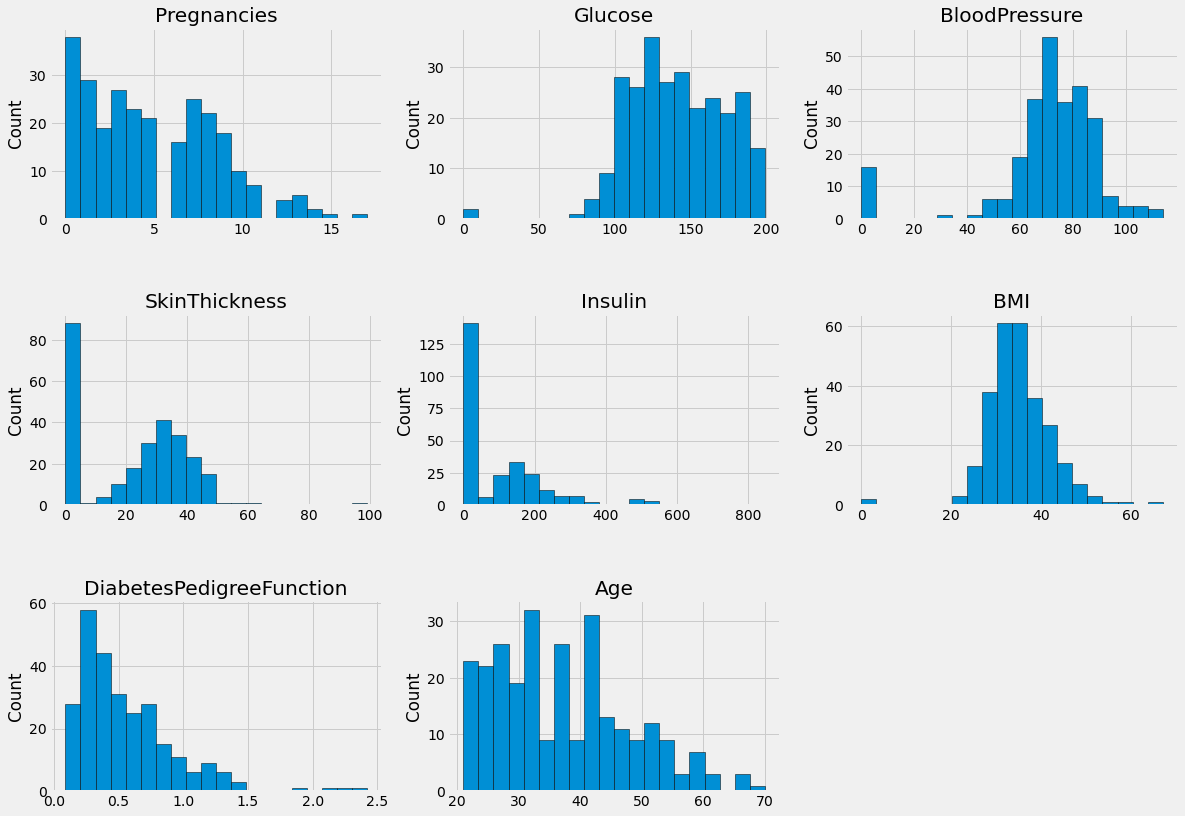

In [12]:
#General Analysis

data1 = data[data["Outcome"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

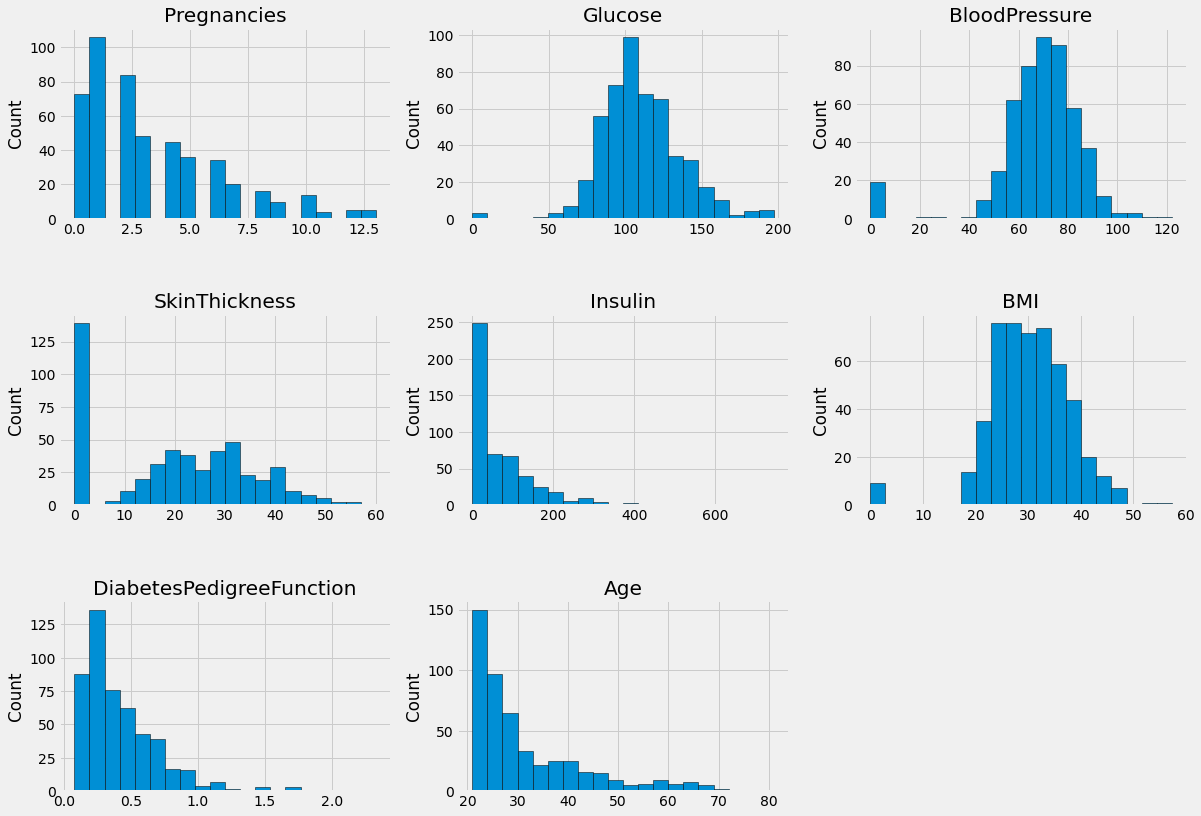

In [13]:
#General Analysis

data1 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

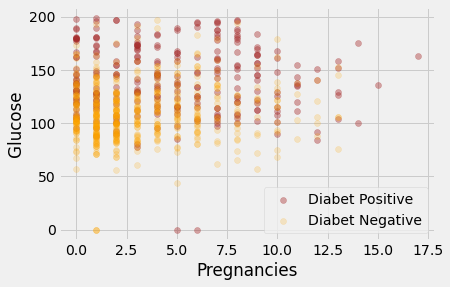

In [14]:
#Visualization, Scatter Plot

plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

#We appear that it is clear segregation.

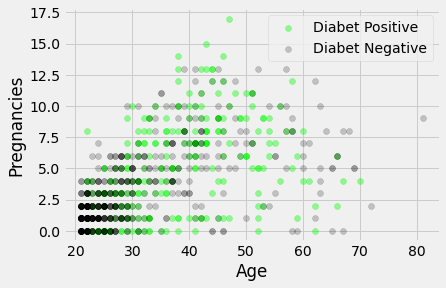

In [15]:
#Visualization, Scatter Plot

plt.scatter(p.Age,p.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

#We appear that it is clear segregation.

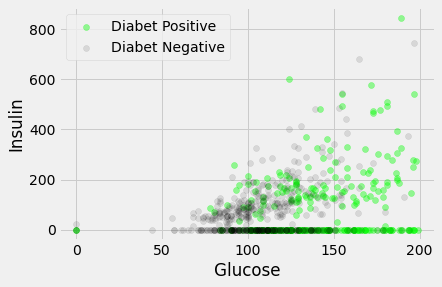

In [16]:
#Visualization, Scatter Plot

plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

#We appear that it is clear segregation.

In [17]:
#separate data as x (features) & y (labels)
y= data.Outcome.values
x1= data.drop(["Outcome"],axis= 1) #we remowe diagnosis for predict


In [18]:
#normalization
x = (x1-np.min(x1))/(np.max(x1)-np.min(x1))

In [19]:
#Comparison of ML Classification Algorithms
#Train-Test-Split 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =  train_test_split(x,y,test_size=0.3,random_state=42)


In [21]:
#Logistic Regression Classification¶
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


In [22]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7616352201257862
Standart Deviation Accuracies:  0.048131816098786834


In [23]:
LR.fit(xtrain,ytrain)
print("Test Accuracy {}".format(LR.score(xtest,ytest))) 

LRscore = LR.score(xtest,ytest)

Test Accuracy 0.7445887445887446


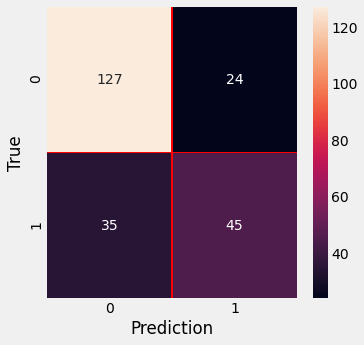

In [66]:
#Confusion Matrix

yprediciton1= LR.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [25]:
#Create-KNN-model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 40) #n_neighbors = K value

In [26]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = KNN, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7431167016072676
Standart Deviation Accuracies:  0.04692037472446394


In [27]:
KNN.fit(xtrain,ytrain) #learning model
prediction = KNN.predict(xtest)
#Prediction
print("{}-NN Score: {}".format(40,KNN.score(xtest,ytest)))

KNNscore = KNN.score(xtest,ytest)

40-NN Score: 0.7532467532467533


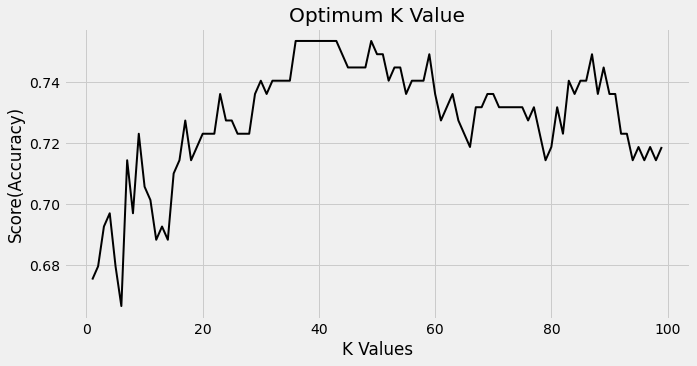

In [28]:
#Find Optimum K value
scores = []
for each in range(1,100):
    KNNfind = KNeighborsClassifier(n_neighbors = each)
    KNNfind.fit(xtrain,ytrain)
    scores.append(KNNfind.score(xtest,ytest))

plt.figure(1, figsize=(10, 5))
plt.plot(range(1,100),scores,color="black",linewidth=2)
plt.title("Optimum K Value")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

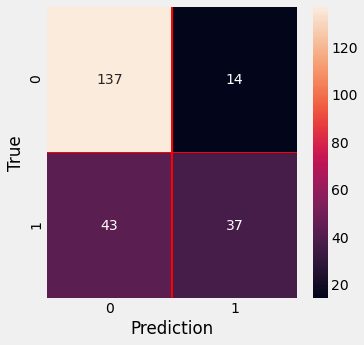

In [67]:
#Confusion Matrix

yprediciton2= KNN.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [31]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [32]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.76722571628232
Standart Deviation Accuracies:  0.055156325649035956


In [33]:
SVM.fit(xtrain,ytrain)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(xtest,ytest))

SVMscore = SVM.score(xtest,ytest)

SVM Accuracy: 0.7532467532467533


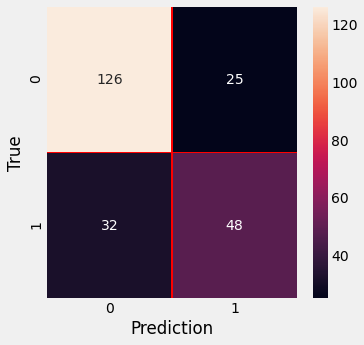

In [40]:
#Confusion Matrix

yprediciton3= SVM.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [35]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [36]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = NB, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7577218728162125
Standart Deviation Accuracies:  0.056690670157824676


In [37]:
NB.fit(xtrain,ytrain) #learning
#prediction
print("Accuracy of NB Score: ", NB.score(xtest,ytest))

NBscore= NB.score(xtest,ytest)

Accuracy of NB Score:  0.7445887445887446


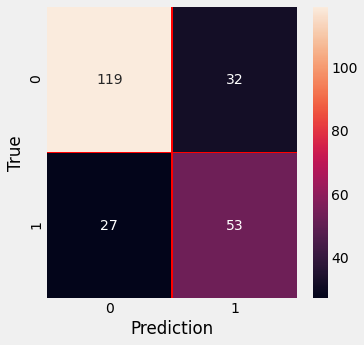

In [39]:
#Confusion Matrix

yprediciton4= NB.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [41]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [42]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))


Average Accuracies:  0.709329140461216
Standart Deviation Accuracies:  0.08114324756907662


In [43]:
DTC.fit(xtrain,ytrain) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(xtest,ytest))
DTCscore = DTC.score(xtest,ytest)

Decision Tree Score:  0.7012987012987013


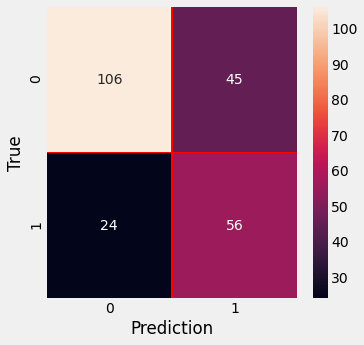

In [45]:
#Confusion Matrix

yprediciton5= DTC.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton5)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [47]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 24, random_state=42) #n_estimator = DT

In [48]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.763487071977638
Standart Deviation Accuracies:  0.04646612575128928


In [49]:
RFC.fit(xtrain,ytrain) # learning
print("Random Forest Score: ",RFC.score(xtest,ytest))
RFCscore=RFC.score(xtest,ytest)

Random Forest Score:  0.7705627705627706


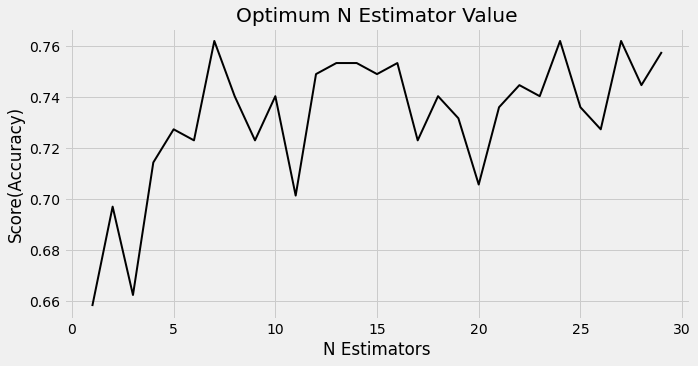

In [50]:
#Find Optimum K value
scores = []
for each in range(1,30):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(xtrain,ytrain)
    scores.append(RFfind.score(xtest,ytest))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,30),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

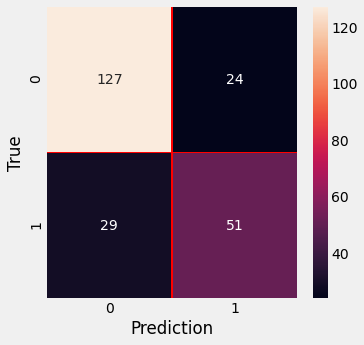

In [68]:
#Confusion Matrix

yprediciton6= RFC.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton6)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [76]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(learning_rate=0.01,
                                  n_estimators=1000,
                                  subsample=0.9,
                                  min_samples_split=2,
                                  min_samples_leaf=6,
                                  max_depth=100,
                                  init=None,
                                  random_state=None,
                                  max_features=None,
                                  verbose=0,
                                  max_leaf_nodes=None,
                                  warm_start=False)

In [77]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = gbdt, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7504542278127183
Standart Deviation Accuracies:  0.0575141396610466


In [80]:
gbdt.fit(xtrain, ytrain)
print("Gradient Boosting Classifier Score", gbdt.score(xtest, ytest))
GBDTscore=gbdt.score(xtest,ytest)

Gradient Boosting Classifier Score 0.7272727272727273


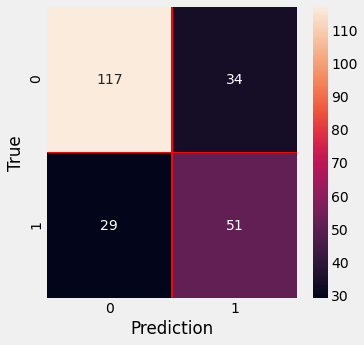

In [90]:
#Confusion Matrix

yprediciton7= gbdt.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton7)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [53]:
#ANN
#Import Library
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [54]:
def buildclassifier():
    classifier = Sequential() #initialize NN
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'tanh', input_dim =xtrain.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'tanh'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier

In [84]:
ANNCF = KerasClassifier(build_fn = buildclassifier, epochs = 200)
accuracies = cross_val_score(estimator = classifier, X = xtrain, y= ytrain, cv = 6)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))


Epoch 1/200
447/447 [==============================] - 0s 501us/step - loss: 0.6924 - accuracy: 0.6353
Epoch 2/200
447/447 [==============================] - 0s 53us/step - loss: 0.6908 - accuracy: 0.6398
Epoch 3/200
447/447 [==============================] - 0s 51us/step - loss: 0.6889 - accuracy: 0.6398
Epoch 4/200
447/447 [==============================] - 0s 46us/step - loss: 0.6869 - accuracy: 0.6398
Epoch 5/200
447/447 [==============================] - 0s 49us/step - loss: 0.6844 - accuracy: 0.6398
Epoch 6/200
447/447 [==============================] - 0s 52us/step - loss: 0.6813 - accuracy: 0.6398
Epoch 7/200
447/447 [==============================] - 0s 48us/step - loss: 0.6774 - accuracy: 0.6398
Epoch 8/200
447/447 [==============================] - 0s 53us/step - loss: 0.6724 - accuracy: 0.6398
Epoch 9/200
447/447 [==============================] - 0s 49us/step - loss: 0.6666 - accuracy: 0.6398
Epoch 10/200
447/447 [==============================] - 0s 45us/step - loss: 0.66

447/447 [==============================] - 0s 43us/step - loss: 0.4793 - accuracy: 0.7494
Epoch 160/200
447/447 [==============================] - 0s 39us/step - loss: 0.4785 - accuracy: 0.7651
Epoch 161/200
447/447 [==============================] - 0s 44us/step - loss: 0.4790 - accuracy: 0.7606
Epoch 162/200
447/447 [==============================] - 0s 42us/step - loss: 0.4797 - accuracy: 0.7584
Epoch 163/200
447/447 [==============================] - 0s 45us/step - loss: 0.4786 - accuracy: 0.7584
Epoch 164/200
447/447 [==============================] - 0s 43us/step - loss: 0.4776 - accuracy: 0.7629
Epoch 165/200
447/447 [==============================] - 0s 43us/step - loss: 0.4785 - accuracy: 0.7673
Epoch 166/200
447/447 [==============================] - 0s 46us/step - loss: 0.4781 - accuracy: 0.7606
Epoch 167/200
447/447 [==============================] - 0s 44us/step - loss: 0.4777 - accuracy: 0.7606
Epoch 168/200
447/447 [==============================] - 0s 42us/step - loss: 

447/447 [==============================] - 0s 55us/step - loss: 0.6427 - accuracy: 0.6577
Epoch 117/200
447/447 [==============================] - 0s 55us/step - loss: 0.6428 - accuracy: 0.6577
Epoch 118/200
447/447 [==============================] - 0s 52us/step - loss: 0.6426 - accuracy: 0.6577
Epoch 119/200
447/447 [==============================] - 0s 55us/step - loss: 0.6428 - accuracy: 0.6577
Epoch 120/200
447/447 [==============================] - 0s 43us/step - loss: 0.6426 - accuracy: 0.6577
Epoch 121/200
447/447 [==============================] - 0s 58us/step - loss: 0.6427 - accuracy: 0.6577
Epoch 122/200
447/447 [==============================] - 0s 117us/step - loss: 0.6426 - accuracy: 0.6577
Epoch 123/200
447/447 [==============================] - 0s 79us/step - loss: 0.6426 - accuracy: 0.6577
Epoch 124/200
447/447 [==============================] - 0s 46us/step - loss: 0.6427 - accuracy: 0.6577
Epoch 125/200
447/447 [==============================] - 0s 45us/step - loss:

447/447 [==============================] - 0s 60us/step - loss: 0.4690 - accuracy: 0.7875
Epoch 74/200
447/447 [==============================] - 0s 51us/step - loss: 0.4678 - accuracy: 0.7830
Epoch 75/200
447/447 [==============================] - 0s 45us/step - loss: 0.4667 - accuracy: 0.7875
Epoch 76/200
447/447 [==============================] - 0s 47us/step - loss: 0.4665 - accuracy: 0.7852
Epoch 77/200
447/447 [==============================] - 0s 47us/step - loss: 0.4668 - accuracy: 0.7852
Epoch 78/200
447/447 [==============================] - 0s 62us/step - loss: 0.4670 - accuracy: 0.7875
Epoch 79/200
447/447 [==============================] - 0s 56us/step - loss: 0.4778 - accuracy: 0.7718
Epoch 80/200
447/447 [==============================] - 0s 52us/step - loss: 0.4752 - accuracy: 0.7785
Epoch 81/200
447/447 [==============================] - 0s 56us/step - loss: 0.4673 - accuracy: 0.7852
Epoch 82/200
447/447 [==============================] - 0s 49us/step - loss: 0.4687 - 

448/448 [==============================] - 0s 45us/step - loss: 0.6045 - accuracy: 0.6451
Epoch 31/200
448/448 [==============================] - 0s 51us/step - loss: 0.5943 - accuracy: 0.6451
Epoch 32/200
448/448 [==============================] - 0s 56us/step - loss: 0.5795 - accuracy: 0.6451
Epoch 33/200
448/448 [==============================] - 0s 49us/step - loss: 0.5672 - accuracy: 0.6451
Epoch 34/200
448/448 [==============================] - 0s 47us/step - loss: 0.5583 - accuracy: 0.6451
Epoch 35/200
448/448 [==============================] - 0s 51us/step - loss: 0.5497 - accuracy: 0.6451
Epoch 36/200
448/448 [==============================] - 0s 58us/step - loss: 0.5466 - accuracy: 0.6451
Epoch 37/200
448/448 [==============================] - 0s 59us/step - loss: 0.5405 - accuracy: 0.6451
Epoch 38/200
448/448 [==============================] - 0s 61us/step - loss: 0.5342 - accuracy: 0.6451
Epoch 39/200
448/448 [==============================] - 0s 50us/step - loss: 0.5286 - 

448/448 [==============================] - 0s 61us/step - loss: 0.4757 - accuracy: 0.7723
Epoch 188/200
448/448 [==============================] - 0s 52us/step - loss: 0.4759 - accuracy: 0.7723
Epoch 189/200
448/448 [==============================] - 0s 57us/step - loss: 0.4761 - accuracy: 0.7746
Epoch 190/200
448/448 [==============================] - 0s 52us/step - loss: 0.4754 - accuracy: 0.7746
Epoch 191/200
448/448 [==============================] - 0s 55us/step - loss: 0.4755 - accuracy: 0.7679
Epoch 192/200
448/448 [==============================] - 0s 64us/step - loss: 0.4769 - accuracy: 0.7634
Epoch 193/200
448/448 [==============================] - 0s 49us/step - loss: 0.4776 - accuracy: 0.7723
Epoch 194/200
448/448 [==============================] - 0s 52us/step - loss: 0.4754 - accuracy: 0.7723
Epoch 195/200
448/448 [==============================] - 0s 50us/step - loss: 0.4758 - accuracy: 0.7723
Epoch 196/200
448/448 [==============================] - 0s 42us/step - loss: 

448/448 [==============================] - 0s 59us/step - loss: 0.4693 - accuracy: 0.7656
Epoch 67/200
448/448 [==============================] - 0s 44us/step - loss: 0.4678 - accuracy: 0.7634
Epoch 68/200
448/448 [==============================] - 0s 45us/step - loss: 0.4694 - accuracy: 0.7567
Epoch 69/200
448/448 [==============================] - 0s 44us/step - loss: 0.4686 - accuracy: 0.7612
Epoch 70/200
448/448 [==============================] - 0s 43us/step - loss: 0.4674 - accuracy: 0.7656
Epoch 71/200
448/448 [==============================] - 0s 47us/step - loss: 0.4661 - accuracy: 0.7679
Epoch 72/200
448/448 [==============================] - 0s 46us/step - loss: 0.4651 - accuracy: 0.7656
Epoch 73/200
448/448 [==============================] - 0s 49us/step - loss: 0.4651 - accuracy: 0.7656
Epoch 74/200
448/448 [==============================] - 0s 52us/step - loss: 0.4673 - accuracy: 0.7701
Epoch 75/200
448/448 [==============================] - 0s 50us/step - loss: 0.4649 - 

448/448 [==============================] - 0s 44us/step - loss: 0.6465 - accuracy: 0.6518
Epoch 24/200
448/448 [==============================] - 0s 46us/step - loss: 0.6462 - accuracy: 0.6518
Epoch 25/200
448/448 [==============================] - 0s 47us/step - loss: 0.6457 - accuracy: 0.6518
Epoch 26/200
448/448 [==============================] - 0s 51us/step - loss: 0.6453 - accuracy: 0.6518
Epoch 27/200
448/448 [==============================] - 0s 40us/step - loss: 0.6444 - accuracy: 0.6518
Epoch 28/200
448/448 [==============================] - 0s 38us/step - loss: 0.6434 - accuracy: 0.6518
Epoch 29/200
448/448 [==============================] - 0s 45us/step - loss: 0.6418 - accuracy: 0.6518
Epoch 30/200
448/448 [==============================] - 0s 51us/step - loss: 0.6402 - accuracy: 0.6518
Epoch 31/200
448/448 [==============================] - 0s 43us/step - loss: 0.6375 - accuracy: 0.6518
Epoch 32/200
448/448 [==============================] - 0s 39us/step - loss: 0.6338 - 

448/448 [==============================] - 0s 44us/step - loss: 0.4526 - accuracy: 0.7946
Epoch 181/200
448/448 [==============================] - 0s 39us/step - loss: 0.4508 - accuracy: 0.7902
Epoch 182/200
448/448 [==============================] - 0s 43us/step - loss: 0.4544 - accuracy: 0.7768
Epoch 183/200
448/448 [==============================] - 0s 42us/step - loss: 0.4515 - accuracy: 0.7924
Epoch 184/200
448/448 [==============================] - 0s 46us/step - loss: 0.4512 - accuracy: 0.7969
Epoch 185/200
448/448 [==============================] - 0s 43us/step - loss: 0.4535 - accuracy: 0.7924
Epoch 186/200
448/448 [==============================] - 0s 46us/step - loss: 0.4505 - accuracy: 0.7924
Epoch 187/200
448/448 [==============================] - 0s 44us/step - loss: 0.4527 - accuracy: 0.7790
Epoch 188/200
448/448 [==============================] - 0s 44us/step - loss: 0.4529 - accuracy: 0.7835
Epoch 189/200
448/448 [==============================] - 0s 43us/step - loss: 

In [87]:
ANNCF.fit(xtrain, ytrain)
print("ANN Score", ANNCF.score(xtest, ytest))
ANNscore=ANNCF.score(xtest,ytest)


Epoch 1/200
537/537 [==============================] - 0s 454us/step - loss: 0.6922 - accuracy: 0.6201
Epoch 2/200
537/537 [==============================] - 0s 53us/step - loss: 0.6900 - accuracy: 0.6499
Epoch 3/200
537/537 [==============================] - 0s 51us/step - loss: 0.6876 - accuracy: 0.6499
Epoch 4/200
537/537 [==============================] - 0s 55us/step - loss: 0.6853 - accuracy: 0.6499
Epoch 5/200
537/537 [==============================] - 0s 77us/step - loss: 0.6825 - accuracy: 0.6499
Epoch 6/200
537/537 [==============================] - 0s 80us/step - loss: 0.6795 - accuracy: 0.6499
Epoch 7/200
537/537 [==============================] - 0s 59us/step - loss: 0.6754 - accuracy: 0.6499
Epoch 8/200
537/537 [==============================] - 0s 65us/step - loss: 0.6704 - accuracy: 0.6499
Epoch 9/200
537/537 [==============================] - 0s 63us/step - loss: 0.6639 - accuracy: 0.6499
Epoch 10/200
537/537 [==============================] - 0s 67us/step - loss: 0.65

537/537 [==============================] - 0s 45us/step - loss: 0.4589 - accuracy: 0.7840
Epoch 160/200
537/537 [==============================] - 0s 63us/step - loss: 0.4573 - accuracy: 0.7803
Epoch 161/200
537/537 [==============================] - 0s 48us/step - loss: 0.4573 - accuracy: 0.7821
Epoch 162/200
537/537 [==============================] - 0s 49us/step - loss: 0.4582 - accuracy: 0.7765
Epoch 163/200
537/537 [==============================] - 0s 43us/step - loss: 0.4575 - accuracy: 0.7821
Epoch 164/200
537/537 [==============================] - 0s 49us/step - loss: 0.4588 - accuracy: 0.7654
Epoch 165/200
537/537 [==============================] - 0s 46us/step - loss: 0.4572 - accuracy: 0.7821
Epoch 166/200
537/537 [==============================] - 0s 39us/step - loss: 0.4561 - accuracy: 0.7840
Epoch 167/200
537/537 [==============================] - 0s 42us/step - loss: 0.4577 - accuracy: 0.7709
Epoch 168/200
537/537 [==============================] - 0s 45us/step - loss: 

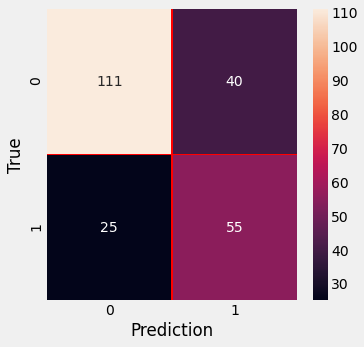

In [89]:
#Confusion Matrix

yprediciton8= ANNCF.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton8)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [56]:
#F1-Score For Logistic Regression
from sklearn.metrics import f1_score
LRf1 = f1_score(ytrue, yprediciton1, average='weighted') 
LRf1

0.7396488695457325

In [57]:
#K-NN
KNNf1= f1_score(ytrue, yprediciton2, average='weighted') 
KNNf1

0.7367438032321222

In [58]:
#SVM
SVMf1=f1_score(ytrue, yprediciton3, average='weighted') 
SVMf1

0.7503970108196265

In [59]:
#naive bayes
NBf1 = f1_score(ytrue, yprediciton4, average='weighted') 
NBf1

0.7463086857026251

In [60]:
#Decision Tree
DTf1=f1_score(ytrue, yprediciton5, average='weighted') 
DTf1

0.7074652407618727

In [61]:
#RandomForest
RFf1=f1_score(ytrue, yprediciton6, average='weighted') 
RFf1 

0.7687305514351853

In [82]:
#GBDT
GBDTf1=f1_score(ytrue, yprediciton7, average='weighted') 
GBDTf1 

0.72910927456382

In [91]:
#ANN
ANNf1=f1_score(ytrue, yprediciton8, average='weighted') 
ANNf1 

0.7233208139131484

In [65]:
#Scatter Plot For Comparasion of ML Algorithms Prediciton Score
scores=[LRscore,KNNscore,SVMscore,NBscore,DTCscore,RFCscore,mean]
AlgorthmsName=["Logistic Regression","K-NN","SVM","Naive Bayes","Decision Tree", "Random Forest","Artificial Neural Network"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [64]:
#Scatter Plot For Comparasion of ML Algorithms Prediciton Scores (F1)
scoresf1=[LRf1,KNNf1,SVMf1,NBf1,DTf1,RFf1]
#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scoresf1,
    name='Algortms Name',
    marker =dict(color='rgba(225,126,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group", 
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores(F1)',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)